In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pmdarima import auto_arima
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.linear_model import Ridge
df = pd.read_csv('data/4020177.csv')
df.head

<bound method NDFrame.head of            STATION                      NAME        DATE  PRCP  SNOW  SNWD  \
0      USC00198368  NWS BOSTON NORTON, MA US    7/1/1994  0.00   0.0   NaN   
1      USC00198368  NWS BOSTON NORTON, MA US    7/2/1994  0.00   0.0   NaN   
2      USC00198368  NWS BOSTON NORTON, MA US    7/3/1994  0.00   0.0   NaN   
3      USC00198368  NWS BOSTON NORTON, MA US    7/4/1994  0.00   0.0   NaN   
4      USC00198368  NWS BOSTON NORTON, MA US    7/5/1994  0.00   0.0   NaN   
...            ...                       ...         ...   ...   ...   ...   
10357  USC00198368  NWS BOSTON NORTON, MA US  11/10/2022  0.00   0.0   0.0   
10358  USC00198368  NWS BOSTON NORTON, MA US  11/11/2022  0.00   0.0   0.0   
10359  USC00198368  NWS BOSTON NORTON, MA US  11/12/2022  0.54   0.0   0.0   
10360  USC00198368  NWS BOSTON NORTON, MA US  11/13/2022  0.12   0.0   0.0   
10361  USC00198368  NWS BOSTON NORTON, MA US  11/14/2022  0.19   0.0   0.0   

       TMAX  TMIN  TOBS  WESD  WE

In [6]:
df.apply(pd.isnull).sum()

STATION        0
NAME           0
DATE           0
PRCP           0
SNOW           2
SNWD        4786
TMAX          51
TMIN          59
TOBS        5354
WESD        8745
WESF        8891
WT01       10215
WT03       10213
WT04       10330
WT05       10351
WT06       10355
WT11       10359
dtype: int64

In [7]:
core_weather = df[["PRCP","SNOW","TMAX","TMIN"]].copy()

In [8]:
core_weather.columns = ["Rain","Snow","Temp_max","Temp_min"]

In [9]:
core_weather

,Rain,Snow,Temp_max,Temp_min
0,0.00,0.0,83.0,64.0
1,0.00,0.0,84.0,58.0
2,0.00,0.0,83.0,64.0
3,0.00,0.0,84.0,62.0
4,0.00,0.0,82.0,53.0
...,...,...,...,...
10357,0.00,0.0,53.0,32.0
10358,0.00,0.0,69.0,43.0
10359,0.54,0.0,71.0,51.0
10360,0.12,0.0,73.0,51.0


In [11]:
core_weather = core_weather.fillna(0)

In [12]:
core_weather

,Rain,Snow,Temp_max,Temp_min
0,0.00,0.0,83.0,64.0
1,0.00,0.0,84.0,58.0
2,0.00,0.0,83.0,64.0
3,0.00,0.0,84.0,62.0
4,0.00,0.0,82.0,53.0
...,...,...,...,...
10357,0.00,0.0,53.0,32.0
10358,0.00,0.0,69.0,43.0
10359,0.54,0.0,71.0,51.0
10360,0.12,0.0,73.0,51.0


In [13]:
core_weather["target"] = core_weather.shift(-1)["Temp_max"]

In [37]:
reg = Ridge(alpha=.2)

In [38]:
predictors = ["Rain","Temp_max","Temp_min"]

In [55]:
train = core_weather.loc[:"2020-30-12"]
test = core_weather.loc["2021-01-01":]

In [62]:
reg.fit(train[predictors],train["target"])

Ridge(alpha=0.2)

In [57]:
prediction = reg.predict(test[predictors])

In [58]:
combined = pd.concat([test["target"], pd.Series(prediction, index=test.index)], axis=1)
combined.columns = ["actual","prediction"]

In [59]:
combined

,actual,prediction
2022,43.0,26.521946
2023,21.0,42.328482
2024,22.0,27.130378
2025,23.0,27.473852
2026,22.0,28.347240
...,...,...
10357,69.0,54.018967
10358,71.0,66.668392
10359,73.0,68.868776
10360,51.0,70.969297


(10300.0, 10361.0)

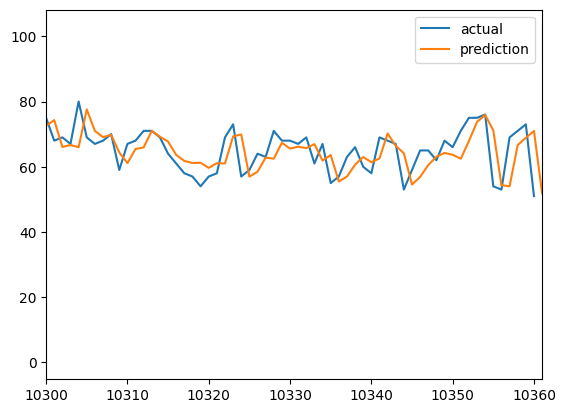

In [60]:
combined.plot()
plt.xlim([10300, 10361])